https://towardsdatascience.com/a-practical-example-in-transfer-learning-with-pytorch-846bb835f2db

In [ ]:
import torch
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.transforms as transforms

Import del Dataset

In [ ]:
# https://www.kaggle.com/datasets/smaranjitghose/corn-or-maize-leaf-disease-dataset

import os
from matplotlib import pyplot as plt
import random

os.environ['KAGGLE_USERNAME'] = "alebelo" # username from the json file
os.environ['KAGGLE_KEY'] = "608d2c18368663d519f0536d566b0dcb" # key from the json file

!kaggle datasets download -d smaranjitghose/corn-or-maize-leaf-disease-dataset # api copied from kaggle
!unzip -o ./corn-or-maize-leaf-disease-dataset.zip
os.remove('corn-or-maize-leaf-disease-dataset.zip')

 95% 153M/161M [00:04<00:00, 35.8MB/s]
100% 161M/161M [00:04<00:00, 36.4MB/s]
Archive:  ./corn-or-maize-leaf-disease-dataset.zip
  inflating: data/Blight/Corn_Blight (1).jpeg  
  inflating: data/Blight/Corn_Blight (1).jpg  
  inflating: data/Blight/Corn_Blight (10).jpg  
  inflating: data/Blight/Corn_Blight (100).jpg  
  inflating: data/Blight/Corn_Blight (1000).JPG  
  inflating: data/Blight/Corn_Blight (1001).JPG  
  inflating: data/Blight/Corn_Blight (1002).JPG  
  inflating: data/Blight/Corn_Blight (1003).JPG  
  inflating: data/Blight/Corn_Blight (1004).JPG  
  inflating: data/Blight/Corn_Blight (1005).JPG  
  inflating: data/Blight/Corn_Blight (1006).JPG  
  inflating: data/Blight/Corn_Blight (1007).JPG  
  inflating: data/Blight/Corn_Blight (1008).JPG  
  inflating: data/Blight/Corn_Blight (1009).JPG  
  inflating: data/Blight/Corn_Blight (101).jpg  
  inflating: data/Blight/Corn_Blight (1010).JPG  
  inflating: data/Blight/Corn_Blight (1011).jpg  
  inflating: data/Blight/Corn_

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import Subset
from sklearn.model_selection import train_test_split
from torchvision.transforms import Compose, ToTensor, Resize
from torch.utils.data import DataLoader

def train_val_dataset(dataset, val_split=0.20):
    train_idx, val_idx = train_test_split(list(range(len(dataset))), test_size=val_split)
    datasets = {}
    datasets['train'] = Subset(dataset, train_idx)
    datasets['val'] = Subset(dataset, val_idx)
    return datasets

!ls ./data/Blight

dataset = ImageFolder('./data', transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
print(dataset)
print(len(train_dataset))

'Corn_Blight (1000).JPG'  'Corn_Blight (312).JPG'  'Corn_Blight (657).JPG'
'Corn_Blight (1001).JPG'  'Corn_Blight (313).JPG'  'Corn_Blight (658).JPG'
'Corn_Blight (1002).JPG'  'Corn_Blight (314).JPG'  'Corn_Blight (659).JPG'
'Corn_Blight (1003).JPG'  'Corn_Blight (315).JPG'  'Corn_Blight (65).jpg'
'Corn_Blight (1004).JPG'  'Corn_Blight (316).JPG'  'Corn_Blight (660).JPG'
'Corn_Blight (1005).JPG'  'Corn_Blight (317).jpg'  'Corn_Blight (661).jpg'
'Corn_Blight (1006).JPG'  'Corn_Blight (318).JPG'  'Corn_Blight (662).JPG'
'Corn_Blight (1007).JPG'  'Corn_Blight (319).JPG'  'Corn_Blight (663).JPG'
'Corn_Blight (1008).JPG'  'Corn_Blight (31).jpg'   'Corn_Blight (664).JPG'
'Corn_Blight (1009).JPG'  'Corn_Blight (320).JPG'  'Corn_Blight (665).JPG'
'Corn_Blight (100).jpg'   'Corn_Blight (321).JPG'  'Corn_Blight (666).JPG'
'Corn_Blight (1010).JPG'  'Corn_Blight (322).JPG'  'Corn_Blight (667).JPG'
'Corn_Blight (1011).jpg'  'Corn_Blight (323).jpg'  'Corn_Blight (668).JPG'
'Corn_Blight (1012).JPG'  

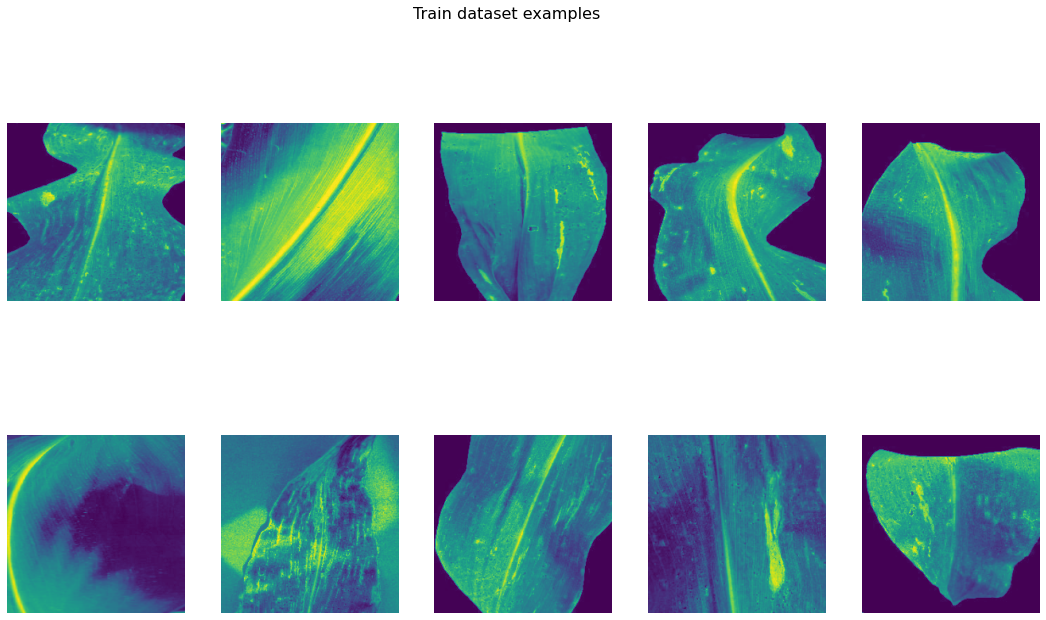

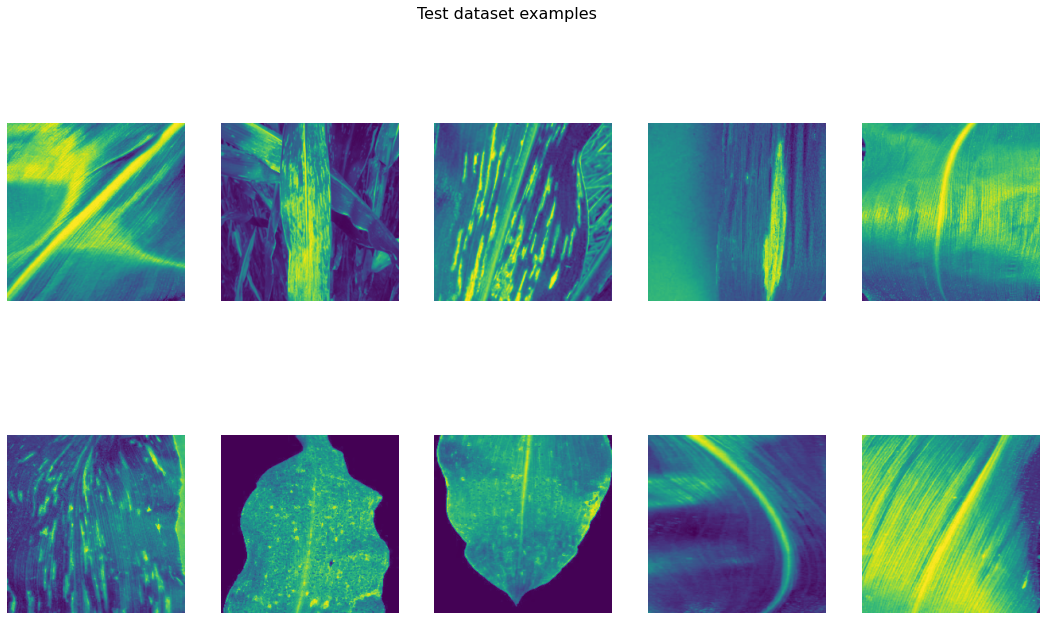

In [ ]:
##### VISUALIZZAZIONE DI 10 IMG DI TRAINING E 10 DI TESTING #######à

fig_train, axs_train = plt.subplots(2, 5)
fig_train.set_size_inches(18.5, 10.5)
fig_train.suptitle("Train dataset examples", fontsize=16)
for i in range(2):
  for j in range(5):
    axs_train[i, j].imshow(train_dataset[random.randint(0,len(train_dataset))][0][0])
    axs_train[i, j].axis('off')

fig_test, axs_test = plt.subplots(2, 5)
fig_test.set_size_inches(18.5, 10.5)
fig_test.suptitle("Test dataset examples", fontsize=16)
for i in range(2):
  for j in range(5):
    axs_test[i, j].imshow(test_dataset[random.randint(0,len(test_dataset))][0][0])
    axs_test[i, j].axis('off')

In [ ]:
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=20,
    shuffle=True,  # set to True to have the data reshuffled at every epoch
    num_workers=4  # how many subprocesses to use for data loading. 0 means that the data will be loaded in the main process
)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=20,
    shuffle=True,
    num_workers=4
)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
from torchvision.models import ViT_L_16_Weights

# https://pytorch.org/vision/main/models/generated/torchvision.models.vit_b_16.html#torchvision.models.ViT_B_16_Weights
# i pesi della rete sono scelti in modo da essere simili a quelli del modello ResNet
model = models.vit_l_16(weights = ViT_L_16_Weights.IMAGENET1K_V1)
model.heads=torch.nn.Sequential(torch.nn.Linear(model.heads.head.in_features, 512),
torch.nn.ReLU(inplace=False),
torch.nn.Dropout(0.5),  
torch.nn.Linear(512, 256),
torch.nn.ReLU(inplace=False),
torch.nn.Dropout(0.5),  
torch.nn.Linear(256, 100),
torch.nn.ReLU(inplace=False),
torch.nn.Dropout(0.5),  
torch.nn.Linear(100, 37))
model.get_parameter


Downloading: "https://download.pytorch.org/models/vit_l_16-852ce7e3.pth" to /root/.cache/torch/hub/checkpoints/vit_l_16-852ce7e3.pth


  0%|          | 0.00/1.13G [00:00<?, ?B/s]

<bound method Module.get_parameter of VisionTransformer(
  (conv_proj): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=1024, out_features=1024, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=1024, out_features=4096, bias=True)
          (1): GELU(approximate=none)
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=4096, out_features=1024, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((1024,), eps=1e-

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

NUM_EPOCHS = 25
device = torch.device('cuda')
model.to(device)

optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

train_acc = []
train_loss = []
test_acc = []
test_loss = []
y_pred = []
y_true = []
cont = 0

print(len(train_dataset))

for epoch in range(NUM_EPOCHS):
    
    train_error_count = 0.0
    loss_cum = 0
    correct = 0
    total = 0
    for images, labels in iter(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()

        outputs = model(images)
        criterion = torch.nn.CrossEntropyLoss()
        loss = criterion(outputs, labels)   

        loss.backward()
        optimizer.step()

        loss_cum += loss.item()   # sommo il valore di loss di ogni immagine
        cont = cont + 1 

        train_error_count += float(torch.sum(torch.abs(labels - outputs.argmax(1))))
        
        _, predicted = outputs.max(1)
        total += int(labels.shape[0])
        correct += predicted.eq(labels).sum().item()
        
    train_acc.append(correct/total)

    train_loss.append((loss_cum/len(train_dataset))) # lo aggiungo alla lista delle loss di ogni epoca
    loss_cum = 0
    cont = 0
 
    test_error_count = 0.0
    correct = 0
    total = 0
    for images, labels in iter(test_loader):
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()

        outputs = model(images)        
        criterion = torch.nn.CrossEntropyLoss()
        loss = criterion(outputs, labels)   

        loss.backward()
        optimizer.step()

        # loss.item() contains the loss of the entire mini-batch,  It’s because the loss
        # given loss functions is divided by the number of elements i.e. the reduction parameter is mean by default(divided by the batch size)
        loss_cum += loss.item()   # sommo il valore di loss di ogni immagine
        cont = cont + 1  

        test_error_count += float(torch.sum(torch.abs(labels - outputs.argmax(1))))

        _, predicted = outputs.max(1)
        total += int(labels.shape[0])
        correct += predicted.eq(labels).sum().item()

        output = (torch.max(torch.exp(outputs), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction

        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth
        
        

    test_acc.append(correct/total)

    test_loss.append((loss_cum/len(test_dataset))) # lo aggiungo alla lista delle loss di ogni epoca
    cont = 0

    print("Epoch {}/{}, Train Loss: {:.3f}, Test Loss: {:.3f}, Train Accuracy: {:.3f}, Test Accuracy: {:.3f}".format(epoch+1,NUM_EPOCHS,train_loss[epoch],test_loss[epoch],train_acc[epoch],test_acc[epoch],))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch 1/15, Train Loss: 0.032, Test Loss: 0.010, Train Accuracy: 0.595, Test Accuracy: 0.868
Epoch 2/15, Train Loss: 0.006, Test Loss: 0.004, Train Accuracy: 0.921, Test Accuracy: 0.955
Epoch 3/15, Train Loss: 0.003, Test Loss: 0.002, Train Accuracy: 0.955, Test Accuracy: 0.979
Epoch 4/15, Train Loss: 0.001, Test Loss: 0.001, Train Accuracy: 0.988, Test Accuracy: 0.990
Epoch 5/15, Train Loss: 0.001, Test Loss: 0.001, Train Accuracy: 0.994, Test Accuracy: 0.993
Epoch 6/15, Train Loss: 0.000, Test Loss: 0.000, Train Accuracy: 0.996, Test Accuracy: 0.995
Epoch 7/15, Train Loss: 0.000, Test Loss: 0.000, Train Accuracy: 0.998, Test Accuracy: 0.995
Epoch 8/15, Train Loss: 0.000, Test Loss: 0.000, Train Accuracy: 0.998, Test Accuracy: 0.995
Epoch 9/15, Train Loss: 0.000, Test Loss: 0.000, Train Accuracy: 0.998, Test Accuracy: 0.995
Epoch 10/15, Train Loss: 0.000, Test Loss: 0.000, Train Accuracy: 0.998, Test Accuracy: 0.995
Epoch 11/15, Train Loss: 0.000, Test Loss: 0.000, Train Accuracy: 0.9

In [ ]:
print("TRAIN LOSS: ")
for i in range(NUM_EPOCHS):
  print(str(round(train_loss[i],3)) + ",", end=" ")
print("\n")

print("TRAIN ACCURACY: ")
for i in range(NUM_EPOCHS):
  print(str(round(train_acc[i],3)) + ",", end=" ")
print("\n")

print("TEST LOSS: ")
for i in range(NUM_EPOCHS):
  print(str(round(test_loss[i],3)) + ",", end=" ")
print("\n")

print("TEST ACCURACY: ")
for i in range(NUM_EPOCHS):
  print(str(round(test_acc[i],3)) + ",", end=" ")

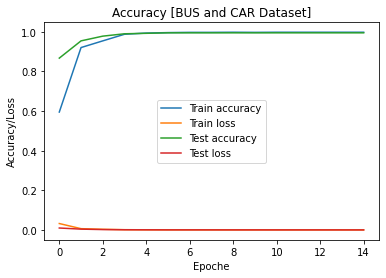

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(0, NUM_EPOCHS), train_acc, label="Train accuracy")
plt.plot(np.arange(0, NUM_EPOCHS), train_loss, label="Train loss")
plt.plot(np.arange(0, NUM_EPOCHS), test_acc, label="Test accuracy")
plt.plot(np.arange(0, NUM_EPOCHS), test_loss, label="Test loss")
plt.title("Accuracy [Leaf Dataset]")
plt.xlabel("Epoche")
plt.ylabel("Accuracy/Loss")
plt.legend(loc="center")

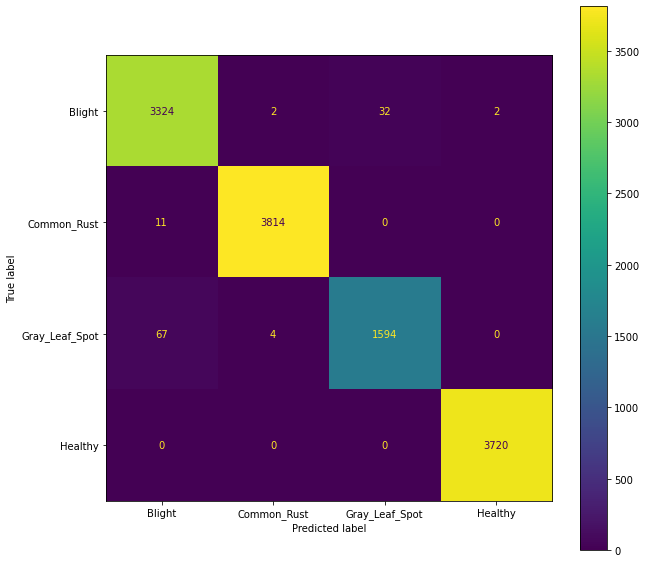

In [ ]:
from numpy.core.fromnumeric import size
# https://christianbernecker.medium.com/how-to-create-a-confusion-matrix-in-pytorch-38d06a7f04b7
# Build confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cf_matrix = confusion_matrix(y_true, y_pred)

cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['Blight', 'Common_Rust','Gray_Leaf_Spot','Healthy'])
fig, ax = plt.subplots(figsize=(10,10))
cmd.plot(ax=ax)